In [1]:
print('hello world')

hello world


importing essential libraries

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.api as sm
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [14]:
df = pd.read_csv(r"E:\data analytics projects\cleaned_road_accident_analysis.csv")

df.head()

df

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,defect_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_type,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,number_of_vehicles_involved,number_of_casualties,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2 years,Automobile,Owner,Above 10 years,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10 years,Public (> 45 seats),Owner,5-10 years,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2 years,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10 years,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5 years,NaN,Owner,5-10 years,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5 years,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10 years,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10 years,Bajaj,Owner,2-5 years,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10 years,Lorry (41?100Q),Owner,2-5 years,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [14]:
df=df.drop_duplicates()
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [36]:
(df['Service_year_of_vehicle'].unique())

array(['Above 10yr', '5-10yrs', nan, '1-2yr', '2-5yrs', 'Unknown',
       'Below 1yr'], dtype=object)

In [89]:
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].str.replace('yr','years')
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].str.replace('yrs','years').str.replace('years',' years')

In [94]:
df['Driving_experience']=df['Driving_experience'].str.replace('yr','years').str.replace('years',' years')

In [104]:
df['Casualty_severity'].unique()

array(['na', '3', '2', '1'], dtype=object)

In [108]:
df.columns=df.columns.str.lower()

In [114]:
df["accident_severity"].value_counts()

accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

In [207]:
severity_counts = df["accident_severity"].value_counts()
severity_percent = df["accident_severity"].value_counts(normalize=True) * 100

# Highest category
top_category = severity_counts.idxmax()
top_value = severity_percent.max()

# Lowest category
bottom_category = severity_counts.idxmin()
bottom_value = severity_percent.min()

print(f"The majority of accidents result in {top_category} ({top_value:.2f}%).")
print(f"The least common outcome is {bottom_category} ({bottom_value:.2f}%).")


The majority of accidents result in Slight Injury (84.56%).
The least common outcome is Fatal injury (1.28%).


In [113]:
df["accident_severity"].value_counts(normalize=True)*100

accident_severity
Slight Injury     84.564794
Serious Injury    14.152322
Fatal injury       1.282884
Name: proportion, dtype: float64

In [115]:
df["day_of_week"].value_counts()

day_of_week
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: count, dtype: int64

In [208]:
day_counts = df["day_of_week"].value_counts(normalize=True) * 100

top_day = day_counts.idxmax()
top_day_value = day_counts.max()

bottom_day = day_counts.idxmin()
bottom_day_value = day_counts.min()

print(f"Accidents occur most frequently on {top_day} ({top_day_value:.2f}%).")
print(f"Accidents occur least frequently on {bottom_day} ({bottom_day_value:.2f}%).")


Accidents occur most frequently on Friday (16.57%).
Accidents occur least frequently on Sunday (11.91%).


In [117]:
df["age_band_of_driver"].value_counts()

age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

In [118]:
df["sex_of_driver"].value_counts()

sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64

In [211]:
sex_counts = df["sex_of_driver"].value_counts()
sex_percent = df["sex_of_driver"].value_counts(normalize=True) * 100

top_sex = sex_counts.idxmax()
top_value = sex_percent.max()

bottom_sex = sex_counts.idxmin()
bottom_value = sex_percent.min()

print(f"The majority of drivers involved in accidents are {top_sex} ({top_value:.2f}%).")
print(f"{bottom_sex} drivers account for a smaller proportion ({bottom_value:.2f}%).")


The majority of drivers involved in accidents are Male (92.86%).
Unknown drivers account for a smaller proportion (1.45%).


In [119]:
df["sex_of_driver"].value_counts(normalize=True)*100

sex_of_driver
Male       92.862943
Female      5.691783
Unknown     1.445274
Name: proportion, dtype: float64

In [121]:
df["cause_of_accident"].value_counts()

cause_of_accident
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: count, dtype: int64

In [212]:
cause_counts = df["cause_of_accident"].value_counts()
cause_percent = df["cause_of_accident"].value_counts(normalize=True) * 100

# Most common cause
top_cause = cause_counts.idxmax()
top_value = cause_percent.max()

# Least common cause
bottom_cause = cause_counts.idxmin()
bottom_value = cause_percent.min()

print(f"The leading cause of accidents is '{top_cause}', accounting for {top_value:.2f}% of total cases.")
print(f"The least frequent cause is '{bottom_cause}', contributing only {bottom_value:.2f}% of cases.")


The leading cause of accidents is 'No distancing', accounting for 18.37% of total cases.
The least frequent cause is 'Unknown', contributing only 0.20% of cases.


In [122]:
df["driving_experience"].value_counts()

driving_experience
5-10 years        3363
2-5 years         2613
Above 10 years    2262
1-2 years         1756
Below 1 years     1342
No Licence         118
unknown             33
Name: count, dtype: int64

In [213]:
exp_counts = df["driving_experience"].value_counts()
exp_percent = df["driving_experience"].value_counts(normalize=True) * 100

# Most common experience group
top_exp = exp_counts.idxmax()
top_value = exp_percent.max()

# Least common experience group
bottom_exp = exp_counts.idxmin()
bottom_value = exp_percent.min()

print(f"The majority of accidents involve drivers with '{top_exp}' experience ({top_value:.2f}%).")
print(f"The least represented group is '{bottom_exp}' ({bottom_value:.2f}%).")


The majority of accidents involve drivers with '5-10 years' experience (29.28%).
The least represented group is 'unknown' (0.29%).


In [124]:
df["casualty_class"].value_counts()

casualty_class
Driver or rider    4944
na                 4443
Pedestrian         1649
Passenger          1280
Name: count, dtype: int64

In [214]:
casualty_counts = df["casualty_class"].value_counts()
casualty_percent = df["casualty_class"].value_counts(normalize=True) * 100

# Most affected class
top_class = casualty_counts.idxmax()
top_value = casualty_percent.max()

# Least affected class
bottom_class = casualty_counts.idxmin()
bottom_value = casualty_percent.min()

print(f"The majority of casualties belong to the '{top_class}' category ({top_value:.2f}%).")
print(f"The least affected group is '{bottom_class}' ({bottom_value:.2f}%).")


The majority of casualties belong to the 'Driver or rider' category (40.14%).
The least affected group is 'Passenger' (10.39%).


In [126]:
df["fitness_of_casuality"].value_counts()

fitness_of_casuality
Normal          9608
NormalNormal      19
Deaf              18
Other             18
Blind             18
Name: count, dtype: int64

In [215]:
fitness_counts = df["fitness_of_casuality"].value_counts()
fitness_percent = df["fitness_of_casuality"].value_counts(normalize=True) * 100

# Most common category
top_fitness = fitness_counts.idxmax()
top_value = fitness_percent.max()

# Least common category
bottom_fitness = fitness_counts.idxmin()
bottom_value = fitness_percent.min()

print(f"The majority of casualties fall under the '{top_fitness}' category ({top_value:.2f}%).")
print(f"The least represented category is '{bottom_fitness}' ({bottom_value:.2f}%).")


The majority of casualties fall under the 'Normal' category (99.25%).
The least represented category is 'Deaf' (0.19%).


In [128]:
df["type_of_vehicle"].value_counts()

type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

In [216]:
vehicle_counts = df["type_of_vehicle"].value_counts()
vehicle_percent = df["type_of_vehicle"].value_counts(normalize=True) * 100

# Most common vehicle type
top_vehicle = vehicle_counts.idxmax()
top_value = vehicle_percent.max()

# Least common vehicle type
bottom_vehicle = vehicle_counts.idxmin()
bottom_value = vehicle_percent.min()

print(f"The majority of accidents involve '{top_vehicle}' ({top_value:.2f}%).")
print(f"The least involved vehicle type is '{bottom_vehicle}' ({bottom_value:.2f}%).")

The majority of accidents involve 'Automobile' (28.20%).
The least involved vehicle type is 'Bicycle' (0.18%).


In [143]:
df["area_accident_occured"].value_counts()

area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

In [145]:
df["types_of_junction"].value_counts()

types_of_junction
Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: count, dtype: int64

In [146]:
df["road_surface_type"].value_counts()

road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64

In [147]:
df["road_surface_conditions"].value_counts()

road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64

In [148]:
df["light_conditions"].value_counts()

light_conditions
Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: count, dtype: int64

In [150]:
df["weather_conditions"].value_counts()

weather_conditions
Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: count, dtype: int64

In [152]:
df["type_of_collision"].value_counts()

type_of_collision
Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64

In [155]:
df["number_of_vehicles_involved"].value_counts()

number_of_vehicles_involved
2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: count, dtype: int64

In [157]:
df.to_csv(r'E:\data analytics projects\cleaned_road_accident_analysis.csv',index=False)

In [160]:
total_accidents=df.shape[0]
print(f"total number of accidents :{total_accidents}")

total number of accidents :12316


In [16]:
df["type_of_collision"].value_counts()

type_of_collision
Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64

In [17]:
df[['number_of_vehicles_involved',
    'number_of_casualties']].describe()

,number_of_vehicles_involved,number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


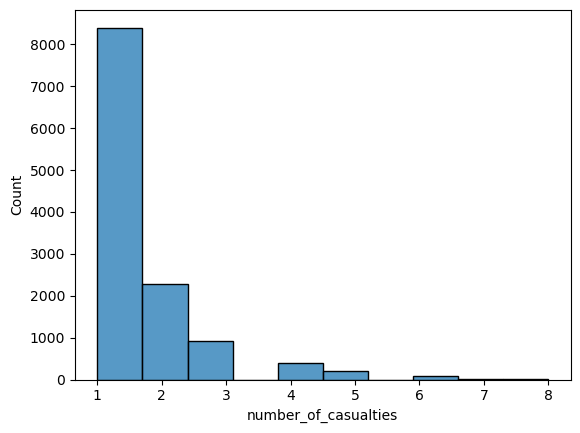

In [23]:
sns.histplot(df['number_of_casualties'], bins=10)
plt.show()

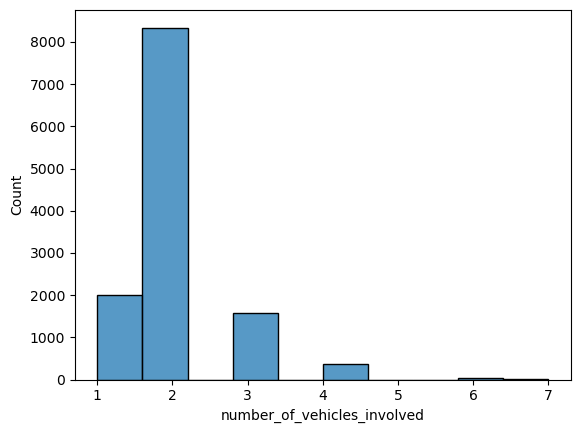

In [26]:
sns.histplot(df['number_of_vehicles_involved'],bins=10)
plt.show()

Chi square tests

Used for categorical vs categorical.

Significance level = 0.05

so i am checking if there any relation between the weather condition and accident severity

Contingency table

In [35]:
cont_table=pd.crosstab(df['weather_conditions'],df['accident_severity'])
print(cont_table)

accident_severity   Fatal injury  Serious Injury  Slight Injury
weather_conditions                                             
Cloudy                         0               8            117
Fog or mist                    0               1              9
Normal                       135            1474           8454
Other                          0              28            268
Raining                       23             158           1150
Raining and Windy              0               2             38
Snow                           0               5             56
Unknown                        0              51            241
Windy                          0              16             82


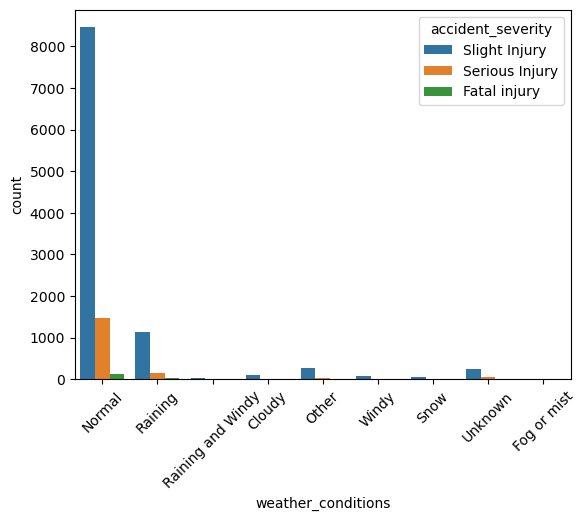

In [130]:
sns.countplot(x='weather_conditions',hue='accident_severity',data=df)
plt.xticks(rotation=45)
plt.show()

In [177]:
n = cont_table.sum().sum()

In [178]:
chi2, p, dof, expected = chi2_contingency(cont_table)

In [179]:
cramers_v = np.sqrt(chi2 / (n * (min(cont_table.shape)-1)))

In [180]:
print("p-value:", p)

if p > 0.05:
    print("There is no statistically significant relationship.")
else:
    print("There is a statistically significant relationship.")
    print("Cramer's V:", cramers_v)

    if cramers_v < 0.1:
        print("Association strength: Very Weak")
    elif cramers_v < 0.3:
        print("Association strength: Weak to Moderate")
    elif cramers_v < 0.5:
        print("Association strength: Moderate")
    else:
        print("Association strength: Strong")

p-value: 0.00042962619787108736
There is a statistically significant relationship.
Cramer's V: 0.04117074706752134
Association strength: Very Weak


checking driving experience vs accident severity

In [56]:
cont_table2=pd.crosstab(df['driving_experience'],df['accident_severity'])
print(cont_table2)

accident_severity   Fatal injury  Serious Injury  Slight Injury
driving_experience                                             
1-2 years                     21             228           1507
2-5 years                     46             381           2186
5-10 years                    41             462           2860
Above 10 years                29             323           1910
Below 1 years                  7             207           1128
No Licence                     0              13            105
unknown                        1               6             26


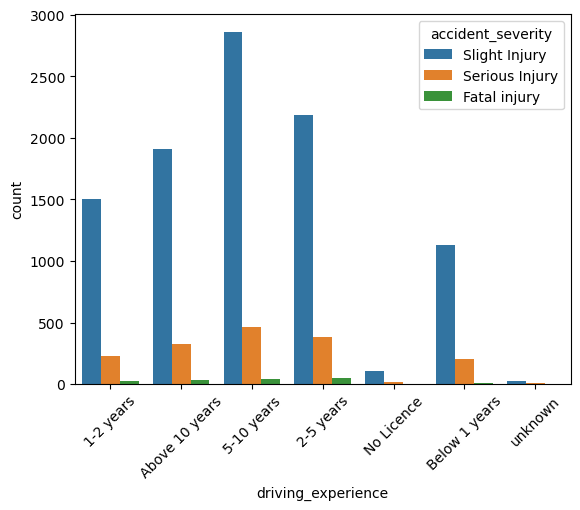

In [131]:
sns.countplot(x='driving_experience',hue='accident_severity',data=df)
plt.xticks(rotation=45)
plt.show()

In [173]:
n = cont_table2.sum().sum()

In [174]:
chi2,p,dof,expected = chi2_contingency(cont_table2)

In [175]:
cramers_v = np.sqrt(chi2 / (n * (min(cont_table2.shape)-1)))

In [176]:
print("p-value:", p)

if p > 0.05:
    print("There is no statistically significant relationship.")
else:
    print("There is a statistically significant relationship.")
    print("Cramer's V:", cramers_v)

    if cramers_v < 0.1:
        print("Association strength: Very Weak")
    elif cramers_v < 0.3:
        print("Association strength: Weak to Moderate")
    elif cramers_v < 0.5:
        print("Association strength: Moderate")
    else:
        print("Association strength: Strong")

p-value: 0.0728730298077968
There is no statistically significant relationship.


Light conditions vs severity

In [71]:
cont_table3=pd.crosstab(df['light_conditions'],df['accident_severity'])
print(cont_table3)

accident_severity        Fatal injury  Serious Injury  Slight Injury
light_conditions                                                    
Darkness - lights lit              66             465           2755
Darkness - lights unlit             0               7             33
Darkness - no lighting              5              49            138
Daylight                           87            1222           7489


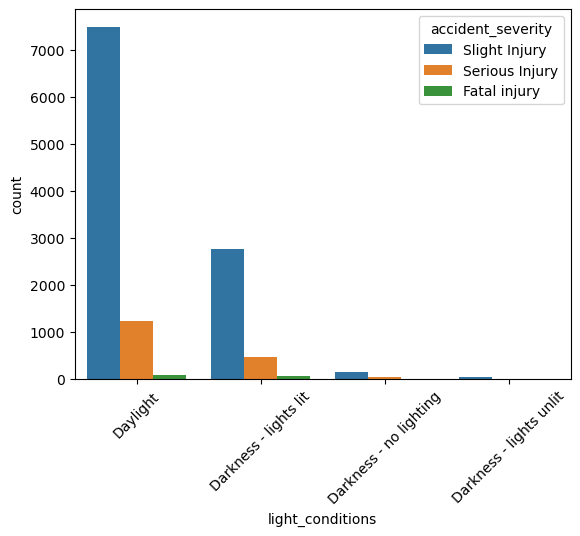

In [134]:
sns.countplot(x='light_conditions',hue='accident_severity',data=df)
plt.xticks(rotation=45)
plt.show()

In [169]:
n = cont_table3.sum().sum()

In [170]:
chi2,p,dof,expected = chi2_contingency(cont_table3)

In [171]:
cramers_v = np.sqrt(chi2 / (n * (min(cont_table3.shape)-1)))

In [172]:
print("p-value:", p)

if p > 0.05:
    print("There is no statistically significant relationship.")
else:
    print("There is a statistically significant relationship.")
    print("Cramer's V:", cramers_v)

    if cramers_v < 0.1:
        print("Association strength: Very Weak")
    elif cramers_v < 0.3:
        print("Association strength: Weak to Moderate")
    elif cramers_v < 0.5:
        print("Association strength: Moderate")
    else:
        print("Association strength: Strong")

p-value: 4.6279540659702016e-08
There is a statistically significant relationship.
Cramer's V: 0.04275380895335406
Association strength: Very Weak


In [118]:
cont_table4=pd.crosstab(df['road_surface_type'],df['accident_severity'])
print(cont_table4)

accident_severity                 Fatal injury  Serious Injury  Slight Injury
road_surface_type                                                            
Asphalt roads                              148            1593           9555
Asphalt roads with some distress             1               7             73
Earth roads                                  7              49            302
Gravel roads                                 0              45            197
Other                                        1              26            140


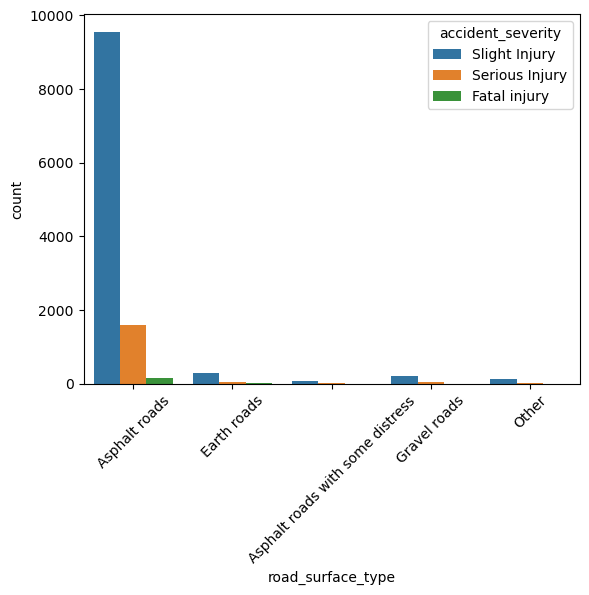

In [137]:
sns.countplot(x='road_surface_type',hue='accident_severity',data=df)
plt.xticks(rotation=45)
plt.show()

In [181]:
n = cont_table4.sum().sum()

In [182]:
chi2,p,dof,expected = chi2_contingency(cont_table4)

In [183]:
cramers_v = np.sqrt(chi2 / (n * (min(cont_table4.shape)-1)))

In [184]:
print("p-value:", p)

if p > 0.05:
    print("There is no statistically significant relationship.")
else:
    print("There is a statistically significant relationship.")
    print("Cramer's V:", cramers_v)

    if cramers_v < 0.1:
        print("Association strength: Very Weak")
    elif cramers_v < 0.3:
        print("Association strength: Weak to Moderate")
    elif cramers_v < 0.5:
        print("Association strength: Moderate")
    else:
        print("Association strength: Strong")

p-value: 0.20124010840608184
There is no statistically significant relationship.


cause of accident vs accident severity

In [120]:
cont_table5=pd.crosstab(df['cause_of_accident'],df['accident_severity'])
print(cont_table5)

accident_severity                     Fatal injury  Serious Injury  \
cause_of_accident                                                    
Changing lane to the left                       16             206   
Changing lane to the right                      23             260   
Driving at high speed                            2              31   
Driving carelessly                              22             209   
Driving to the left                              4              53   
Driving under the influence of drugs             5              46   
Drunk driving                                    0               3   
Getting off the vehicle improperly               3              29   
Improper parking                                 1               2   
Moving Backward                                 26             162   
No distancing                                   20             303   
No priority to pedestrian                        5              95   
No priority to vehic

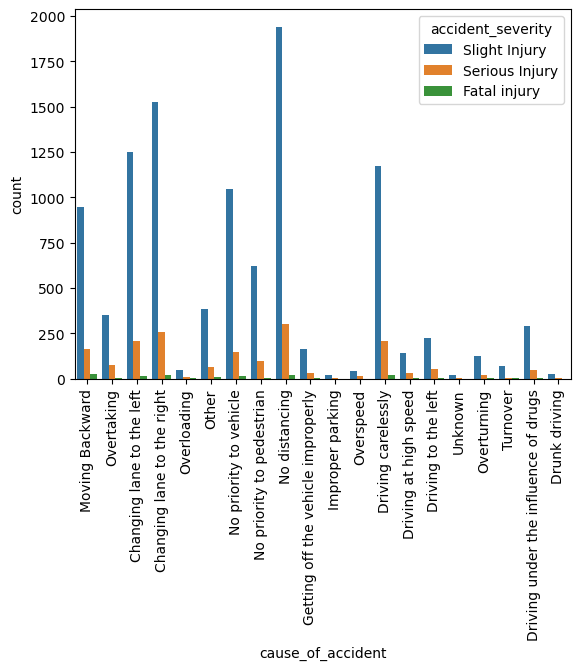

In [141]:
sns.countplot(x='cause_of_accident',hue='accident_severity',data=df)
plt.xticks(rotation=90)
plt.show()

In [187]:
n = cont_table5.sum().sum()

In [186]:
chi2,p,dof,expected = chi2_contingency(cont_table5)

In [185]:
cramers_v = np.sqrt(chi2 / (n * (min(cont_table5.shape)-1)))

In [190]:
print("p-value:", p)

if p > 0.05:
    print("There is no statistically significant relationship.")
else:
    print("There is a statistically significant relationship.")
    print("Cramer's V:", cramers_v)

    if cramers_v < 0.1:
        print("Association strength: Very Weak")
    elif cramers_v < 0.3:
        print("Association strength: Weak to Moderate")
    elif cramers_v < 0.5:
        print("Association strength: Moderate")
    else:
        print("Association strength: Strong")

p-value: 0.1075290287988518
There is no statistically significant relationship.


Logistic Regression

In [192]:
df['severity_binary'] = df['accident_severity'].apply(
    lambda x: 1 if x in ['Serious Injury','Fatal injury'] else 0
)

In [200]:
df_model = pd.get_dummies(
    df[['weather_conditions',
        'driving_experience',
        'light_conditions',
        'number_of_vehicles_involved',
        'severity_binary']],
    drop_first=True
)

In [203]:
X = df_model.drop('severity_binary', axis=1)
y = df_model['severity_binary']

X = sm.add_constant(X)

# Force numeric
X = X.astype(float)

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.422555
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        severity_binary   No. Observations:                12316
Model:                          Logit   Df Residuals:                    12297
Method:                           MLE   Df Model:                           18
Date:                Wed, 18 Feb 2026   Pseudo R-squ.:                 0.01773
Time:                        02:02:11   Log-Likelihood:                -5204.2
converged:                       True   LL-Null:                       -5298.2
Covariance Type:            nonrobust   LLR p-value:                 2.569e-30
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9

In [204]:
odds_ratios = np.exp(result.params)
print(odds_ratios)

const                                       0.148091
number_of_vehicles_involved                 0.649009
weather_conditions_Fog or mist              1.715647
weather_conditions_Normal                   3.144864
weather_conditions_Other                    1.642511
weather_conditions_Raining                  2.452673
weather_conditions_Raining and Windy        0.771244
weather_conditions_Snow                     1.523699
weather_conditions_Unknown                  3.286200
weather_conditions_Windy                    2.751332
driving_experience_2-5 years                1.113310
driving_experience_5-10 years               0.991742
driving_experience_Above 10 years           1.051793
driving_experience_Below 1 years            1.077661
driving_experience_No Licence               0.719891
driving_experience_unknown                  1.550634
light_conditions_Darkness - lights unlit    1.186911
light_conditions_Darkness - no lighting     2.021139
light_conditions_Daylight                   0.

In [220]:
for var in result.params.index:
    
    if var == "const":
        continue
    
    p_value = result.pvalues[var]
    
    # Only interpret significant variables
    if p_value < 0.05:
        
        coef = result.params[var]
        odds_ratio = np.exp(coef)
        
        if odds_ratio > 1:
            percent_change = (odds_ratio - 1) * 100
            direction = "increases"
        else:
            percent_change = (1 - odds_ratio) * 100
            direction = "decreases"
        
        print(f"{var}:")
        print(f"  Odds Ratio = {odds_ratio:.3f}")
        print(f"  Interpretation: This variable {direction} the odds of severe accident by approximately {percent_change:.2f}%.\n")


number_of_vehicles_involved:
  Odds Ratio = 0.649
  Interpretation: This variable decreases the odds of severe accident by approximately 35.10%.

weather_conditions_Normal:
  Odds Ratio = 3.145
  Interpretation: This variable increases the odds of severe accident by approximately 214.49%.

weather_conditions_Raining:
  Odds Ratio = 2.453
  Interpretation: This variable increases the odds of severe accident by approximately 145.27%.

weather_conditions_Unknown:
  Odds Ratio = 3.286
  Interpretation: This variable increases the odds of severe accident by approximately 228.62%.

weather_conditions_Windy:
  Odds Ratio = 2.751
  Interpretation: This variable increases the odds of severe accident by approximately 175.13%.

light_conditions_Darkness - no lighting:
  Odds Ratio = 2.021
  Interpretation: This variable increases the odds of severe accident by approximately 102.11%.

light_conditions_Daylight:
  Odds Ratio = 0.890
  Interpretation: This variable decreases the odds of severe accid